## An Investigation of the Impact of Two-Step Tax Rates on Income Distribution and Welfare

### Introduction

In this notebook, we explore the inherent tension between efficiency and equality in economic policy-making, specifically within the context of progressive tax structures. The crux of our exploration revolves around the design of an optimal tax structure, and the consequential effects on labor supply, income distribution, and social welfare. To do this, we simulate a population of workers with associated wages, introduce a basic income concept, and a fixed cost of work.

The primary problem that this study addresses is determining the tax structure that can meet specific government revenue targets while simultaneously achieving two diverse objectives: reducing income inequality and maximizing total social welfare. The complexity of balancing these objectives in the context of the tax structure is what we aim to unravel. We explore these dimensions through a two-step tax bracket structure. In our model, we represent individual preferences over consumption and leisure through a utility function, and set up an optimization problem for each simulated individual. Their goal is to maximize utility within the constraints of their budget, which is affected by both taxes and fixed costs. We measure income inequality using the Gini coefficient, and total welfare as a composite measure of both utility and income inequality.

To address the differing policy perspectives on the importance of utility versus income inequality, we introduce a parameter alpha. The alpha parameter allows us to weigh these considerations in our welfare measure, representing a spectrum of policy preferences from purely utilitarian (alpha = 0) to purely egalitarian (alpha = 1). 
In the end, we present our findings visually to illuminate the optimal tax structure under various policy preferences.

### Approach & Analysis

This section explains our approach to the analysis. We use a quantitative research method with a simulated dataset of individuals' wages and various two-step tax rates. It is worth noting that the hypothetical dataset we use for the analysis is generated using standard statistical techniques to ensure a robust and reliable analysis.

We start our simulation by generating the wage rates of 10 000 individuals. The wage rates are random samples from a logarithmic distribution and tells us how much an individual earns if they spend all their time working.

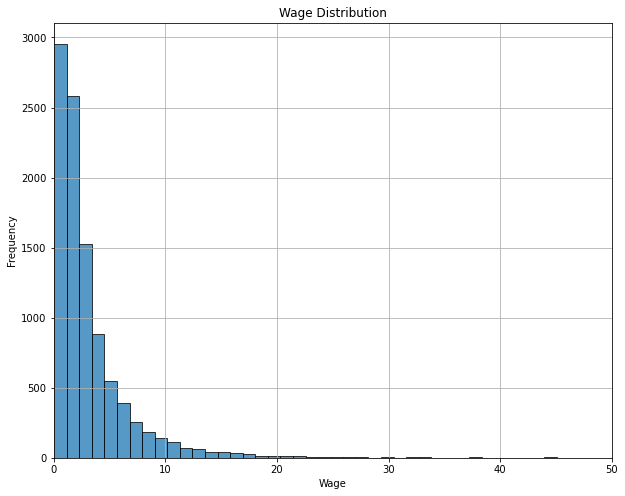

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# To get same data every code run
np.random.seed(42)

# We should have 10 000  individuals
n_individuals = 10000

# generate wages, what the individual earns when working 100%
wages = np.exp(np.random.normal(size = n_individuals))*2

plt.figure(figsize=(10,8))
plt.hist(wages, bins=90, edgecolor='black', alpha=0.75)
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.title('Wage Distribution')
plt.grid(True)
plt.xlim(0, 50)  # Set the limits of the x-axis
plt.show()

We also assume that each individual incurs a random fixed cost of working between 0 and 1, which represent any expenses that an individual incurs regardless of their level of work, such as the cost of transportation to get to work or the cost of maintaining a work wardrobe. The individuals also receives a basic income of 2.1 (arbitrarily chosen). The basic income represents a fixed amount of money that an individual receives regardless of their level of work. It could represent income from sources such as government benefits or a trust fund. The plot below showcases the distribution of the wages of the fictitious country

In [2]:
# Introducing a fixed cost of working
Fs = np.random.uniform(size=n_individuals) 

# Basic income that individuals earn regardless
I = 2.1

# Budget given tax rates, where step defines the two income brackets
def budget_constraint(m, w, I, Fs, t1, t2, step = 3):
    """
    Calculates an individual's budget after taxes and fixed costs, subject to a budget constraint.

    Parameters
    ----------
    m : float
        The fraction of time that the individual is willing to work, between 0 and 1.
    w : float
        The hourly wage rate.
    I : float
        Additional income from sources other than work.
    Fs : float
        Fixed costs that the individual incurs.
    t1 : float
        The tax rate on the first `step` units of income, expressed as a fraction between 0 and 1.
    t2 : float
        The tax rate on income above `step`, expressed as a fraction between 0 and 1.
    step : float, optional
        The income level at which the tax rate changes from `t1` to `t2`. Default is 3.

    Returns
    -------
    budget : float
        The individual's budget after taxes and fixed costs.
    """
    income = w * m + I
    if income <= step:
        return income * (1 - t1) - Fs * (m > 0)
    else:
        return  (1 - t1)* step + (1 - t2) * (income - step) - Fs * (m > 0)

To simulate the individuals behavour, we use a utility function that takes into account consumption and the opportunity cost of labour. As we assume all individuals use their entire budget on consumption, the utility function serves as measurement of taxed income less the cost of labour. The cost of labour uses two parameters, the amount the individual work (m), an the elasticity of labour, (e). (m) is between 0 and 1, where 1 signifies working at maximum capacity. The elasticity of labor supply captures how responsive an individual's labor supply is to changes in the wage rate. We have chosen a constant elasticity of 0.5, but a higher elasticity of labor supply would mean that an individual is more willing to adjust their work hours in response to changes in the wage rate, while a lower elasticity would mean that an individual is less responsive to such changes.

In [3]:
# Utility function
def utility(C, m, e=0.5):
  """
    > m - the amount an individual is willing to work, between 0 and 1,
    > C - consumption, 
    > e - elasticiy of labour supply)
  """
  return C - (1 / (1 + 1 / e)) * m**(1 + 1 / e)

Maximising utility

In [4]:
from scipy.optimize import minimize_scalar

# Gives the utility, given the budget and m, as a negative measure (which is a convention)
def objective(m, w, I, Fs, t1, t2):
    C = budget_constraint(m, w, I, Fs, t1, t2)
    return -utility(C, m)

# Finds the m between 1 and 0 which gives the lowest (highest) utility
def optimize_labor_supply(w, I, Fs, t1, t2):
    res = minimize_scalar(objective, args=(w, I, Fs, t1, t2), bounds=(0, 1), method='bounded')
    
    #comparing with consumption if m = 0
    C = budget_constraint(0, w, I, Fs, t1, t2)
    res_c= budget_constraint(res.x, w, I, Fs, t1, t2)

    if utility(C, 0) > utility(res_c, res.x):
        return 0
    else:
        return res.x

Tradeoff between leisure and labor

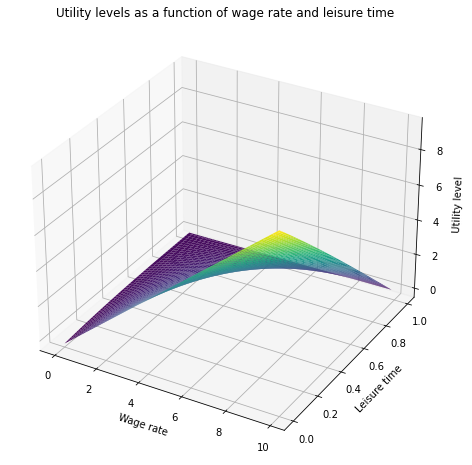

In [5]:
from mpl_toolkits.mplot3d import Axes3D


# Utility function 1
def utility(C, m, e=0.5):
    return C - (1 / (1 + 1 / e)) * m**(1 + 1 / e)

# Define wage rate and leisure time ranges
w_range = (np.arange(0, 10, 0.1))
l_range = np.arange(0, 1, 0.01)

# Compute utility levels for each combination of wage rate and leisure time
utility_levels = np.zeros((len(w_range), len(l_range)))
for i, w in enumerate(w_range):
    for j, l in enumerate(l_range):
        m = 1 - l  # calculate work amount from leisure time
        C = w * m  # calculate consumption from wage rate and work amount
        utility_levels[i, j] = utility(C, m)

# Create a 3D surface plot of utility levels as a function of wage rate and leisure time
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
W, L = np.meshgrid(w_range, l_range)
ax.plot_surface(W, L, utility_levels.T, cmap='viridis')
ax.set_xlabel('Wage rate')
ax.set_ylabel('Leisure time')
ax.set_zlabel('Utility level')
ax.set_title('Utility levels as a function of wage rate and leisure time')

# ax.invert_yaxis()  # Invert the 'y' axis to display leisure time from 1 to 0

plt.show()

### Labour Supply Generation & Tax Calculations

Our next objective is to simulate labor supply by creating functions where individuals maximize their utility by choosing the optimal amount of work (m) given their budget constraint.

We need to define the budget constraint to ensure that an individual's spending does not exceed their income, taking into account their tax expenses and fixed labor costs. An individual's income is determined by their wage, how much they work, and their basic income of 2.1. To implement a progressive two-step tax system, we will tax individuals at x% of their income below a certain threshold and y% on income above it. We have set the threshold at 3, which we believe is reasonable because it is close to the mean income after simulating income with taxes. By maximizing their utility function subject to the budget constraint, individuals can make optimal decisions about how much to work.

To simulate labor supply, we need to determine the tax level. We define the tax budget as 22,000 and create five different progressive tax systems with base step 1 rates of 10%, 15%, 20%, 25%, and 30%. We calculate the corresponding step 2 tax rates that achieve a tax system that meets the budget of 22,000. This is a rigorous process for simulating how much individuals will work to maximize utility in the given two-step tax system. We calculate the individual's income and tax expenses at their optimal amount of work. For each base step 1 tax, we calculate the sum of tax expenses for all possible step 2 rates. We choose the tax system that most closely approximates the tax budget.

After running the function, we identified five different two-step tax combinations that produced a tax revenue of 22,000.

In [6]:
def calculate_tax_revenue(t1, t2, wages, Fs, I, step=3):
    """
    This code defines a function called calculate_tax_revenue that takes as inputs the tax rates for two tax brackets t1 and t2, 
    along with the wages, fixed costs, and initial income for a given population of individuals.
    The function first initializes a variable called total_revenue to 0, 
    which will be used to accumulate the tax revenue generated by the given tax rates.
    """
    total_revenue = 0
     # Hours they will be working 
    labor_supplies = np.array([optimize_labor_supply(wages[i], I, Fs[i], t1, t2) for i in range(n_individuals)])
    # Income
    incomes = np.array([labor_supplies[i] * wages[i] for i in range(n_individuals)]) + I
    incomes_taxed = np.array([budget_constraint(labor_supplies[i], wages[i], I, Fs[i], t1, t2) for i in range(n_individuals)])
    tax_revenue = np.sum(incomes) - np.sum(incomes_taxed)
    return tax_revenue

This code below finds the optimal tax rates for two tax brackets (t1 and t2) that will generate a target tax revenue, 
given the inputs of wages, Fs, and I.

In [7]:
from scipy.optimize import minimize_scalar

target_tax_revenue = 22000  # Set your target tax revenue here 
err = target_tax_revenue*0.05
# Range of possible tax rates
t1_values = np.linspace(0.1, 0.3, 5)
t2_values = np.linspace(0.9, 0.5, 5)

def error_function(t2, t1):
    actual_tax_revenue = calculate_tax_revenue(t1, t2, wages, Fs, I)
    return abs(actual_tax_revenue - target_tax_revenue)

tax_rates_that_meet_target = []
for t1 in t1_values:
    res = minimize_scalar(error_function, bounds=(t1, 1), method='bounded', args=(t1,))
    t2_optimal = res.x
    diff = calculate_tax_revenue(t1, t2_optimal, wages, Fs, I) - target_tax_revenue
    if diff > err: 
        def error_function(t1, t2):
            actual_tax_revenue = calculate_tax_revenue(t1, t2, wages, Fs, I)
            return abs(actual_tax_revenue - target_tax_revenue)
        res = minimize_scalar(error_function, bounds=(0, t1), method='bounded', args=(t2_optimal,))
        t1_optimal = res.x
        tax_rates_that_meet_target.append((t1_optimal, t2_optimal))
    elif diff < -err:
        def error_function(t1, t2):
            actual_tax_revenue = calculate_tax_revenue(t1, t2, wages, Fs, I)
            return abs(actual_tax_revenue - target_tax_revenue)
        
        res = minimize_scalar(error_function, bounds=(t1, 1), method='bounded', args=(t2_optimal,))
        t1_optimal = res.x
        tax_rates_that_meet_target.append((t1_optimal, t2_optimal))
    else: 
        tax_rates_that_meet_target.append((t1, t2_optimal))

Checking if the tax revenue matches our target

In [8]:
import pandas as pd

# Initializing an empty list to store the tax revenue and tax rates
tax_revenues = []
t1_values = []
t2_values = []

# Checking if the tax revenue matches our target
for (t1, t2) in tax_rates_that_meet_target:
    tax_revenue = calculate_tax_revenue(t1, t2, wages, Fs, I)
    t1_values.append(t1)
    t2_values.append(t2)
    tax_revenues.append(tax_revenue)
    
tax_rates = tax_rates_that_meet_target

# Creating a DataFrame to store the tax rates and tax revenue
df = pd.DataFrame({'t1': t1_values, 't2': t2_values, 'tax_revenue': tax_revenues})

# Printing the DataFram
df

,t1,t2,tax_revenue
0,0.10,0.693475,22000.023757
1,0.15,0.623136,22000.052659
2,0.20,0.560439,21999.973842
3,0.25,0.502957,21999.968765
4,0.30,0.446450,21999.967193


Note that in addition to computing the tax systems and their revenue, we have simultaneously calculated the amount of work people do, their income, their budget, and their overall utility for each tax system.

### Welfare analysis

We can now look at the total welfare for each tax system, where total welfare is the total utility for all individuals together with the tax revenue. But first, we are going to calcualte the gini coefficient for measurement of welath distribution which we are coming back to later.

In [9]:
# Gini coefficient for measurment of wealth distribution
def gini_coefficient(utilities):
    n = len(utilities)
    sorted_utilities = sorted(utilities)
    numer_sum = sum((i + 1) * u for i, u in enumerate(sorted_utilities))
    denom_sum = sum(sorted_utilities)

    if denom_sum == 0:
        return 0

    gini = (2.0 * numer_sum) / (n * denom_sum) - (n + 1) / n
    return gini

# Calculate the Gini coefficient for each tax rate combination
gini_coefficients = []
ut1 = []
for t1, t2 in tax_rates:
    utilities = [utility(budget_constraint(optimize_labor_supply(w, I, Fs[i], t1, t2), w, I, Fs[i], t1, t2), optimize_labor_supply(w, I, Fs[i], t1, t2)) for i, w in enumerate(wages)]
    ut1.append(np.sum(utilities)+target_tax_revenue)
    gini_coefficients.append(gini_coefficient(utilities))


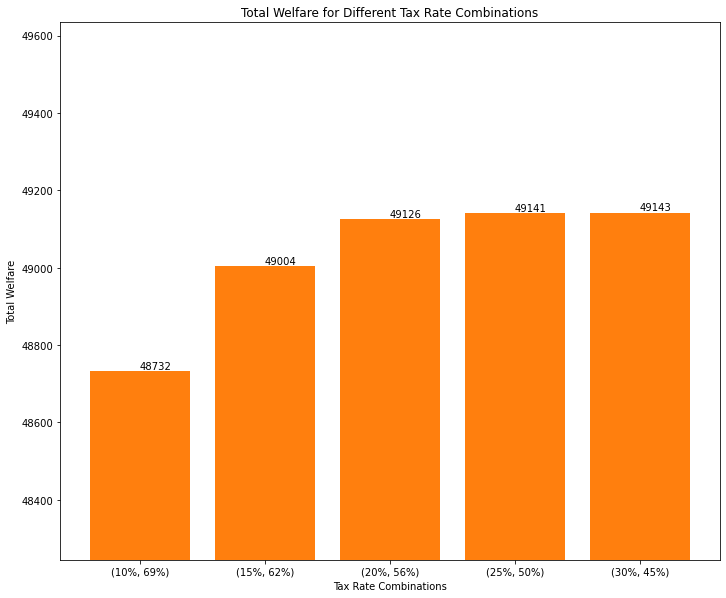

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

tax_rate_labels = [f"({int(round(t1, 2)*100)}%, {int(round(t2, 2)*100)}%)" for t1, t2 in tax_rates]
ax.bar(tax_rate_labels, ut1)

# Here you set the y-axis limits
y_min = min(ut1) - 0.01 * min(ut1)
y_max = max(ut1) + 0.01 * max(ut1)
ax.set_ylim([y_min, y_max])

bars = ax.bar(tax_rate_labels, ut1)

# Add a label to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
ax.set_ylabel('Total Welfare')
ax.set_xlabel('Tax Rate Combinations')
ax.set_title('Total Welfare for Different Tax Rate Combinations')

plt.show()

The total welfare differences between the tax systems are evidently small, with only one tax system (10%, 69%) having slightly lower total welfare. From a purely utilitarian perspective, the (25%, 50%) tax system provides the best welfare.

Simply adding up the welfare of the simulated individuals undoubtedly gives the highest total welfare, since the calculation pays no heed to income inequality; a factor which of course decreases total welfare–a few being better off implies others being less so. How does one measure welfare, however? From a Utilitarian perspective, the summed-up welfare for a country would be indicative of its overall welfare. However, measuring welfare becomes more complicated when one considers other relevant factors, such as the distribution of wealth. Real countries use complicated indexes that contain many factors (education, wealth distribution, crime, salary, tax structure, health services, etc.). Although we did not factor in any of these other factors, we did investigate wealth distribution (simply income in our model). While welfare in and of itself is difficult to measure and interpret (e.g., welfare at 90% tells us what exactly?), simply "adding up" the welfare of a country would be insufficient for telling us anything useful about a country. This is because if welfare was simply the sum of its constituent parts, then two countries could have the same welfare regardless of wealth distribution. In other words, a country in which one person holds 99.99% of the wealth would have the same welfare as a country where it is spread out evenly. Clearly, the first case provides less welfare overall, and we can explain it using marginal benefit.

Marginal benefit refers to the additional benefit gained from obtaining one more unit of a certain resource. In terms of welfare, marginal benefit is used to measure the increase in welfare that an individual or group experiences when they acquire additional wealth or resources. Let us return to our two countries and explain why the extreme wealth case offers less total welfare compared to that of a more equal distribution of wealth. Since marginal benefit has to do with what one gains when obtaining or using one more unit of something, it is easy to see that the marginal benefit of becoming richer decreases beyond a certain point, as the value of each dollar gained decreases. People with lower income have a higher marginal benefit of becoming richer, as each dollar gained is more valuable and can be used to access basic necessities, such as healthcare. Each dollar gained is much more valuable for them than for the rich, who can afford to buy everything they need. Even if they buy another car, the joy of getting it will be less than that of a person who finally affords critical medicine for their children. Therefore, marginal benefit is an important factor to consider when measuring welfare, as it helps to determine the distribution of wealth and resources in a country.

Due to the mechanisms used in simulating our fictitious population of workers, welfare is composed of only two components: the income individuals receive from working, and government benefits (tax revenue given back to the population).


### Income Inequality Analysis

Simply adding up the welfare of individuals does not accurately represent a country's total welfare. Something is missing, something that can take the distribution of wealth into account. Our starting point for that discussion is the Gini Coefficient. The Gini coefficient is a measure of inequality in the distribution of wealth or resources within a population. It ranges from 0 to 1, with 0 indicating perfect equality (all individuals have the same income) and 1 indicating perfect inequality (one individual has all the income). A higher Gini coefficient means greater inequality, and a lower coefficient indicates a more equal distribution of wealth or resources. Here is a plot that visually shows the Gini Index of 10 random countries with data from 2015.

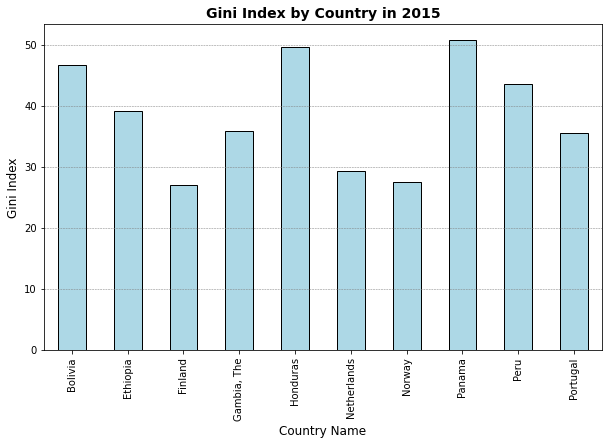

In [11]:
# !pip install datapackage
from datapackage import Package
import random

package = Package('https://datahub.io/world-bank/si.pov.gini/datapackage.json')

for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        df = pd.read_csv(resource.descriptor['path'])
        break

# Filter the data to only include the year 2015
df = df[df["Year"] == 2015]

# Get a list of unique countries in the data
countries = df["Country Name"].unique().tolist()

# Randomly select 10 countries from the list (including Norway)
random_countries = random.sample(countries, 11)
if "Norway" in random_countries:
    random_countries.remove("Norway")
random_countries = ["Norway"] + random_countries[:9]

# Filter the data to only include the selected countries
df = df[df["Country Name"].isin(random_countries)]

# Plot the data
ax = df.plot(kind="bar", x="Country Name", y="Value", color="lightblue", edgecolor="black", legend=False, figsize=(10,6))

# Add labels and title to the plot
ax.set_xlabel("Country Name", fontsize=12)
ax.set_ylabel("Gini Index", fontsize=12)
ax.set_title("Gini Index by Country in 2015", fontsize=14, fontweight='bold')

# Set the font size for the x and y ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Add grid lines to the plot
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

Since greater inequality generally leads to lower welfare, our welfare function has to take that into account—it weighs welfare depending on how well-off individuals are. In other words, instead of simply adding up the welfare, we adjust the welfare of individuals according to their level of wealth, which is only income in our simplified model. A poorer individual's welfare is weighted less to reflect the fact that a lack of wealth significantly lowers their welfare compared to that of a wealthy person. Without this adjustment, we would have the case of a country where one individual holds 99.99% of the wealth, yet maximum welfare is achieved.

Examining the tax system's corresponding Gini coefficients in terms of utility can reveal the distribution of income among individuals. This is because an individual's utility is a function of their income.


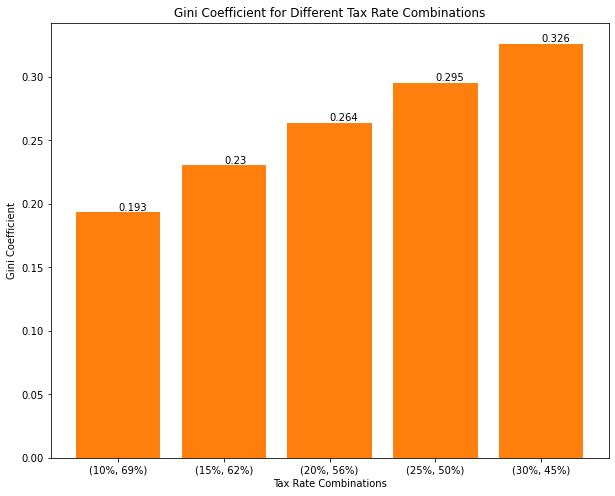

In [12]:
# Create a bar plot to visualize the Gini coefficient for each tax rate combination
fig, ax = plt.subplots(figsize=(10,8))

tax_rate_labels = [f"({int(round(t1, 2)*100)}%, {int(round(t2, 2)*100)}%)" for t1, t2 in tax_rates]
ax.bar(tax_rate_labels, gini_coefficients)
# Add a label to each bar

bars = ax.bar(tax_rate_labels, gini_coefficients)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval,3), va='bottom')  # va: vertical alignment

ax.set_ylabel('Gini Coefficient')
ax.set_xlabel('Tax Rate Combinations')
ax.set_title('Gini Coefficient for Different Tax Rate Combinations')

plt.show()


The plotted Gini coefficients show that the tax system with rates of (10%, 60%) results in the most equal distribution of utility among individuals. Conversely, the tax system with rates of (30%, 45%) results in the greatest inequality of utility among individuals.

It can be inferred that the (10%, 69%) system is very effective due to its low Gini coefficient and relatively high total welfare. However, we need a rigorous method to evaluate which tax system yields the most welfare while also considering the income distribution.

### Weighted Welfare

Our "weighted welfare" function combines an individual's consumption utility with the level of inequality in society. To accomplish this, we sort individuals by their utility and assign higher weights to those with lower utility. Specifically, the weight assignment ranges from 2 for the individual with the lowest utility to 2/10000 for the one with the highest, emphasizing the concern for the less fortunate in our simulated society. Since a low Gini Coefficient indicates low income inequality, the output of the weighted welfare function should be inversely related to the Gini Coefficient. To investigate this relationship, we can plot the weighted welfare for each tax system and its respective Gini Coefficient that was previously computed.

In [13]:
def weighted_welfare(t1, t2, wages, I, Fs, n_individuals, alpha):

    # Hours they will be working 
    labor_supplies = np.array([optimize_labor_supply(wages[i], I, Fs[i], t1, t2) for i in range(n_individuals)])
    # Income
    incomes = np.array([labor_supplies[i] * wages[i] for i in range(n_individuals)]) + I
    incomes_taxed = np.array([budget_constraint(labor_supplies[i], wages[i], I, Fs[i], t1, t2) for i in range(n_individuals)])
    tax_revenue = np.sum(incomes) - np.sum(incomes_taxed)
    mean_tax = tax_revenue / n_individuals

    utilities = np.array([utility(incomes_taxed[i], labor_supplies[i]) for i in range(n_individuals)])

    # Calculates gini
    ut = np.clip(utilities, 0, None)  # Replacing negative values with 0
    gini = gini_coefficient(ut)

    # Adding back the tax, measurement of welfare
    utilities = utilities + mean_tax

    weights = np.array([2 * (n_individuals - i + 1) / n_individuals for i in range(1, n_individuals + 1)])
    sorted_utilities = sorted(utilities, reverse=False)
    
    weighted_util = np.array(sorted_utilities * weights)
    # Sum Weighted Welfare with alpha
    weighted_welfare = np.sum(weighted_util) * alpha
    # Sum un-weighted wlefare with 1 - alpha 

    #få med denne
    utilitarian_welfare = np.sum(sorted_utilities) * (1-alpha)
    # Total welfare
    total_weighted_welfare = (weighted_welfare + utilitarian_welfare)

    return {
        "tax_rates": (t1, t2),
        "total_weighted_welfare": total_weighted_welfare,
        "gini_coefficient": gini, 
        
    }

In [14]:
# Usage example
results = [weighted_welfare(t1, t2, wages, I, Fs, n_individuals, alpha = 0.5) for t1, t2 in tax_rates]

for result in results:
    print(f"Tax rates: t1={result['tax_rates'][0]}, t2={result['tax_rates'][1]}")
    print(f"Total weighted welfare: {result['total_weighted_welfare']}")
    print(f"Gini coefficient: {result['gini_coefficient']}")
    print("")
   

Tax rates: t1=0.1, t2=0.6934745490627222
Total weighted welfare: 46150.89360265004
Gini coefficient: 0.19331467148327142

Tax rates: t1=0.15, t2=0.6231364104419658
Total weighted welfare: 45897.06203787141
Gini coefficient: 0.2303236727085043

Tax rates: t1=0.2, t2=0.560438863920027
Total weighted welfare: 45550.1707801162
Gini coefficient: 0.26385061211038185

Tax rates: t1=0.25, t2=0.5029573448480438
Total weighted welfare: 45136.68210825654
Gini coefficient: 0.2952404833428579

Tax rates: t1=0.3, t2=0.4464502936755185
Total weighted welfare: 44717.86834618368
Gini coefficient: 0.32622540254422727



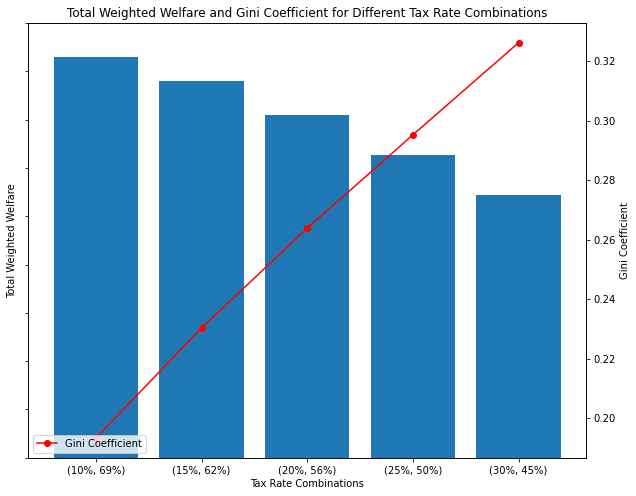

In [15]:
# Create a bar plot to visualize the Total Weighted Welfare and Gini coefficient for each tax rate combination
fig, ax1 = plt.subplots(figsize=(10,8))

tax_rate_labels = [f"({int(round(t1, 2)*100)}%, {int(round(t2, 2)*100)}%)" for t1, t2 in tax_rates]

# Plot the Total Weighted Welfare
ax1.bar(tax_rate_labels, [result['total_weighted_welfare'] for result in results], label='Total Weighted Welfare', alpha=1)
ax1.set_ylabel('Total Weighted Welfare')
ax1.set_xlabel('Tax Rate Combinations')
ax1.set_title('Total Weighted Welfare and Gini Coefficient for Different Tax Rate Combinations')

# Remove y-axis numbers on the left side of the plot
ax1.set_yticklabels([])

# Create a secondary y-axis to plot the Gini coefficient
ax2 = ax1.twinx()
ax2.plot(tax_rate_labels, [result['gini_coefficient'] for result in results], color='red', marker='o', label='Gini Coefficient')
ax2.set_ylabel('Gini Coefficient')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Add auto-located legend to the plot
plt.legend(loc='lower left')

# Set the y-axis range
ax1.set_ylim(42000, 46500)

plt.show()

The plot confirms an inverse relation between weighted welfare and the Gini coefficient. The tax system with the highest total weighted welfare (10%, 69%) has the lowest Gini coefficient, while the opposite is true for the tax system with the lowest weighted welfare (34%, 40%). It is important to note that the Weighted Welfare axis serves only to rank the five tax systems in relation to each other, and its inherent value serves no purpose and cannot be compared to Total Welfare, for instance.

### Alpha Parameter

Our weighted welfare function indicates that the optimal tax system is (10%, 69%). However, when looking at the raw total welfare from a utilitarian perspective, the (10%, 69%) tax system had the lowest welfare. To address this, we need to combine utilitarian and egalitarian principles into our function.

We introduce alpha as a parameter, ranging from 0 to 1, to determine the level of aversion to inequality in our welfare function. If alpha = 0, the function is purely utilitarian, meaning it only aims to maximize total welfare or utility without considering the distribution of welfare among individuals. If alpha is set to 1, the function is entirely focused on minimizing inequality. If alpha is between 0 and 1 then a higher value of alpha places more importance on achieving a more equitable distribution of welfare, while lower values place more emphasis on maximizing total welfare.

Now let us plot the welfare function with an alpha value of 0.2, which places high emphasis on utilitarianism but also takes into account some level of income inequality.


In [16]:
def weighted_welfare(t1, t2, wages, I, Fs, n_individuals, alpha):

    # Hours they will be working 
    labor_supplies = np.array([optimize_labor_supply(wages[i], I, Fs[i], t1, t2) for i in range(n_individuals)])
    # Income
    incomes = np.array([labor_supplies[i] * wages[i] for i in range(n_individuals)]) + I
    incomes_taxed = np.array([budget_constraint(labor_supplies[i], wages[i], I, Fs[i], t1, t2) for i in range(n_individuals)])
    tax_revenue = np.sum(incomes) - np.sum(incomes_taxed)
    mean_tax = tax_revenue / n_individuals

    utilities = np.array([utility(incomes_taxed[i], labor_supplies[i]) for i in range(n_individuals)])

    # Calculates gini
    ut = np.clip(utilities, 0, None)  # Replacing negative values with 0
    gini = gini_coefficient(ut)

    # Adding back the tax, measurement of welfare
    utilities = utilities + mean_tax

    weights = np.array([2 * (n_individuals - i + 1) / n_individuals for i in range(1, n_individuals + 1)])
    sorted_utilities = sorted(utilities, reverse=False)
    
    weighted_util = np.array(sorted_utilities * weights)
    # Sum Weighted Welfare with alpha
    weighted_welfare = np.sum(weighted_util) * alpha
    # Sum un-weighted wlefare with 1 - alpha 

    #få med denne
    utilitarian_welfare = np.sum(utilities) * (1-alpha)
    # Total welfare
    total_weighted_welfare = (weighted_welfare + utilitarian_welfare)

    return {
        "tax_rates": (t1, t2),
        "total_weighted_welfare": total_weighted_welfare,
        "gini_coefficient": gini, 
        
    }

# Usage example
results = [weighted_welfare(t1, t2, wages, I, Fs, n_individuals, alpha = 0.2) for t1, t2 in tax_rates]

for result in results:
    print(f"Tax rates: t1={result['tax_rates'][0]}, t2={result['tax_rates'][1]}")
    print(f"Total weighted welfare: {result['total_weighted_welfare']}")
    print(f"Gini coefficient: {result['gini_coefficient']}")
    print("")

Tax rates: t1=0.1, t2=0.6934745490627222
Total weighted welfare: 47699.755763739035
Gini coefficient: 0.19331467148327142

Tax rates: t1=0.15, t2=0.6231364104419658
Total weighted welfare: 47761.520447401424
Gini coefficient: 0.2303236727085043

Tax rates: t1=0.2, t2=0.560438863920027
Total weighted welfare: 47695.89209308056
Gini coefficient: 0.26385061211038185

Tax rates: t1=0.25, t2=0.5029573448480438
Total weighted welfare: 47539.12548690094
Gini coefficient: 0.2952404833428579

Tax rates: t1=0.3, t2=0.4464502936755185
Total weighted welfare: 47372.79291691045
Gini coefficient: 0.32622540254422727



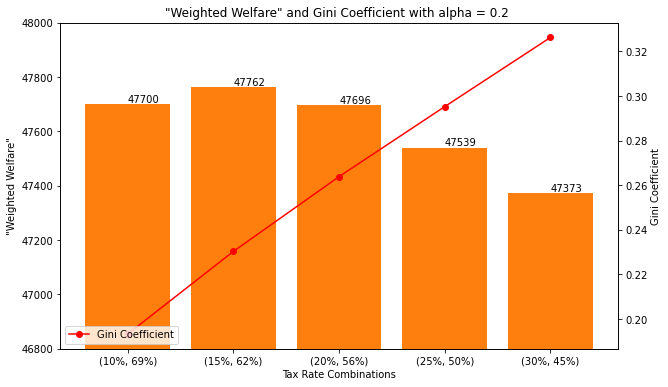

In [17]:
# Create a bar plot to visualize the Total Weighted Welfare and Gini coefficient for each tax rate combination
fig, ax1 = plt.subplots(figsize=(10,6))

tax_rate_labels = [f"({int(round(t1, 2)*100)}%, {int(round(t2, 2)*100)}%)" for t1, t2 in tax_rates]

# Plot the Total Weighted Welfare
ax1.bar(tax_rate_labels, [result['total_weighted_welfare'] for result in results], label='Total Weighted Welfare')
ax1.set_ylabel('"Weighted Welfare"')
ax1.set_xlabel('Tax Rate Combinations')
ax1.set_title('"Weighted Welfare" and Gini Coefficient with alpha = 0.2 ')



# Remove y-axis numbers on the left side of the plot
#ax1.set_yticklabels([])

# Create a secondary y-axis to plot the Gini coefficient
ax2 = ax1.twinx()
ax2.plot(tax_rate_labels, [result['gini_coefficient'] for result in results], color='red', marker='o', label='Gini Coefficient')
ax2.set_ylabel('Gini Coefficient')
bars = ax1.bar(tax_rate_labels, [result['total_weighted_welfare'] for result in results])

# Add a label to each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')  # va: vertical alignment

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Add auto-located legend to the plot
plt.legend(loc='lower left')

# Set the y-axis range
ax1.set_ylim(46800, 48000)

plt.show()


Now, with a stronger emphasis on utilitarianism in our model, the (10%, 69%) tax system is no longer the optimal choice. Instead, the (15%, 62%) tax system is superior.

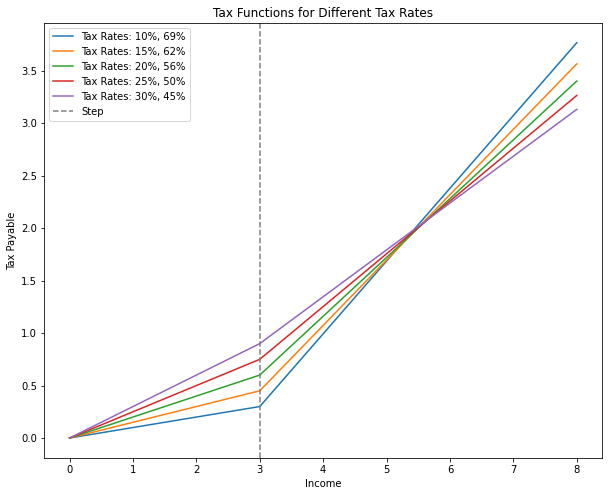

In [18]:
alpha_values = np.linspace(0, 1, 11)  # Adjust the range of alpha values as needed

results = [[weighted_welfare(t1, t2, wages, I, Fs, n_individuals, alpha)
            for t1, t2 in tax_rates] for alpha in alpha_values]

fig, ax = plt.subplots(figsize=(10,8))

# Define the range of incomes for the plot
income_range = np.linspace(0, 8, 10000)

# Plot each tax function
for t1, t2 in tax_rates:
    # Calculate tax for each income level
    tax = np.where(income_range <= 3, t1 * income_range, t1 * 3 + t2 * (income_range - 3))
    
    # Plot the tax function
    ax.step(income_range, tax, label=f"Tax Rates: {int(round(t1, 2)*100)}%, {int(round(t2, 2)*100)}%")
# Add a dotted vertical line at x = 3
ax.axvline(x=3, color='gray', linestyle='--', label='Step')

# Set labels and title
ax.set_xlabel('Income')
ax.set_ylabel('Tax Payable')
ax.set_title('Tax Functions for Different Tax Rates')

# Add legend
ax.legend()

plt.show()

This plot displays all of the two-step tax functions and illustrates what an individual must pay based on their income. The dotted line represents the income level that separates the two tax brackets. As a result, every function has an increased slope after an income of 3.

### Results & Conclusion

By using different values of alpha, we can create a plot displaying the best tax system for each respective alpha value.

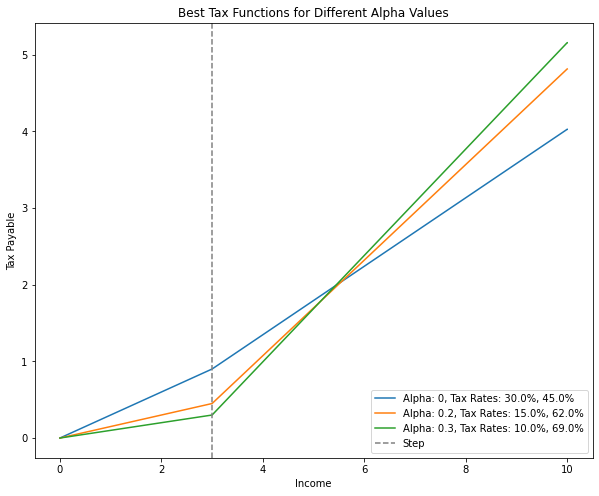

In [19]:
# Define the range of incomes for the plot
income_range = np.linspace(0, 10, 10000)

# Define the alpha values
alpha_values = [0, 0.2, 0.3]

# Calculate the weighted welfare for all tax systems and all alpha values
results = [[weighted_welfare(t1, t2, wages, I, Fs, n_individuals, alpha)
            for t1, t2 in tax_rates] for alpha in alpha_values]

# Find the tax systems that give the highest weighted welfare for each alpha value
best_tax_systems = [max(results_i, key=lambda x: x['total_weighted_welfare'])['tax_rates'] for results_i in results]

fig, ax = plt.subplots(figsize=(10,8))

# Plot each tax function

for alpha, (t1, t2) in zip(alpha_values, best_tax_systems):
    # Calculate tax for each income level
    tax = np.where(income_range <= 3, t1 * income_range, t1 * 3 + t2 * (income_range - 3))
    
    # Plot the tax function
   
    ax.step(income_range, tax, label=f"Alpha: {alpha}, Tax Rates: {round(t1, 2)*100}%, {round(t2, 2)*100}%")
    

  
# Add a dotted vertical line at x = 3
ax.axvline(x=3, color='gray', linestyle='--', label='Step')

# Set labels and title
ax.set_xlabel('Income')
ax.set_ylabel('Tax Payable')
ax.set_title('Best Tax Functions for Different Alpha Values')

# Add legend
ax.legend()

plt.show()


With three different considerations for tradeoffs between efficiency and equality in our economic system, using three different alpha values, we obtain three different optimal tax systems. With an alpha value of 0, representing a purely utilitarian perspective, the tax system (30%, 45%) that maximizes welfare with no concern for income inequality is the winner. With a small alpha of 0.2, meaning that we do have some considerations for income inequality, the (15%, 62%) tax system is the most optimal, as expected from Figure X, a system that emphasizes stronger taxation on the richer individuals. With an even larger alpha of 0.3, the most progressive taxation system is deemed the most beneficial, and since it is the most progressive system, it will also be optimal for all alpha values larger than 0.3.

The fact that a small alpha value results in an immediate preference for the two most progressive tax systems suggests that the five tax systems are quite similar from a utilitarian perspective, as seen in Figure Y. Therefore, we conclude that the (10%, 69%) system is the optimal tax system when optimizing for welfare with some concern for income inequality, given our tax budget and other parameters.

Note that although we can determine the most optimal progressive tax structure given an alpha value, we cannot make meaningful comparisons between different alpha values. This is because the blend of the utilitarian and weighted functions changes the measured welfare, and as a result, the specific units of welfare change as well. Therefore, we cannot compare welfares measured with different alpha values, as they are not in the exact same units. To clarify, we understand which tax bracket is most beneficial for each alpha. However, we cannot determine the degree of benefit one tax bracket provides over another across all alphas. For example, one alpha may produce welfare values that are very similar to those of another alpha. However, we cannot compare their relative sizes since the welfare units are not consistent. Therefore, it is difficult to ascertain which alpha is the most optimal. Nevertheless, given a concern for income inequality, systems (15%, 62%) and (10%, 69%) are better compared to the other three systems.

In conclusion, our study on progressive tax structures has shed light on the inherent tension between efficiency and equality in economic policy-making. Through simulating a population of workers with associated wages, we were able to explore the design of an optimal two-step progressive tax structure given a set tax revenue, and its consequential effects on labor supply, income distribution, and social welfare. Our two-step tax bracket structure allowed us to balance the objectives of reducing income inequality and maximizing total social welfare. We introduced the alpha parameter to weigh the considerations of utility versus income inequality. Our findings visually illustrated the optimal tax structure under various policy preferences.

Our results show that policymakers face a balancing act in setting tax rates. Lower rates can encourage people to work more and earn more, but they can also increase income inequality. Higher rates can promote a fairer income distribution, but they can discourage work and reduce total earnings. Using the Gini coefficient, we found that higher tax rates resulted in lower income inequality. This is because higher tax rates redistribute more income from higher-wage individuals to lower-wage individuals. When we examined the optimal tax rate for each value of alpha, we found that there was a clear trade-off between total welfare and equality. This reinforces the idea that policy decisions about taxation involve complex choices about societal priorities. Policymakers need to weigh these concerns against society's values and goals. Our model's alpha parameter can help quantify these priorities. However, determining its appropriate value in the real world is a complex task that requires careful consideration of societal values and priorities; a process that necessitates deep societal introspection and dialogue.

While our analysis provides useful insights, future research could explore additional factors that influence labor supply decisions, such as social services or other income sources. Future research could also consider more complex tax structures or explore how different wage distributions and fixed costs of working affect the results.